In [36]:
# load the required packages
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
%matplotlib inline

In [46]:
data = pd.read_stata(r'../regression analysis/regression_analysis.dta')
data['geometry'] = data['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(data, geometry = data.geometry, crs = 'epsg:4326')
# Convert the unique cities and years into lists for iteration
cities = data['city'].unique()
city_label = cities
city_label = np.where(city_label == 'xian', "xi'an", city_label)
years = sorted(data['year'].unique())
# export to the csv
# sample_data = data.sample(n = 100, random_state = 1)
# sample_data.to_csv('check result.csv', index = False)

In [47]:
data_list = []
dental_number = []
name_list = []
for city in cities:
    for year in years:
        dataframe = data[data['city'] == city]
        dataframe = dataframe[dataframe['year'] == year]
        name = str(city) + " " + str(year)
        data_number = dataframe['kou'].sum()
        dental_number.append(data_number)
        data_list.append(dataframe)
        name_list.append(name)

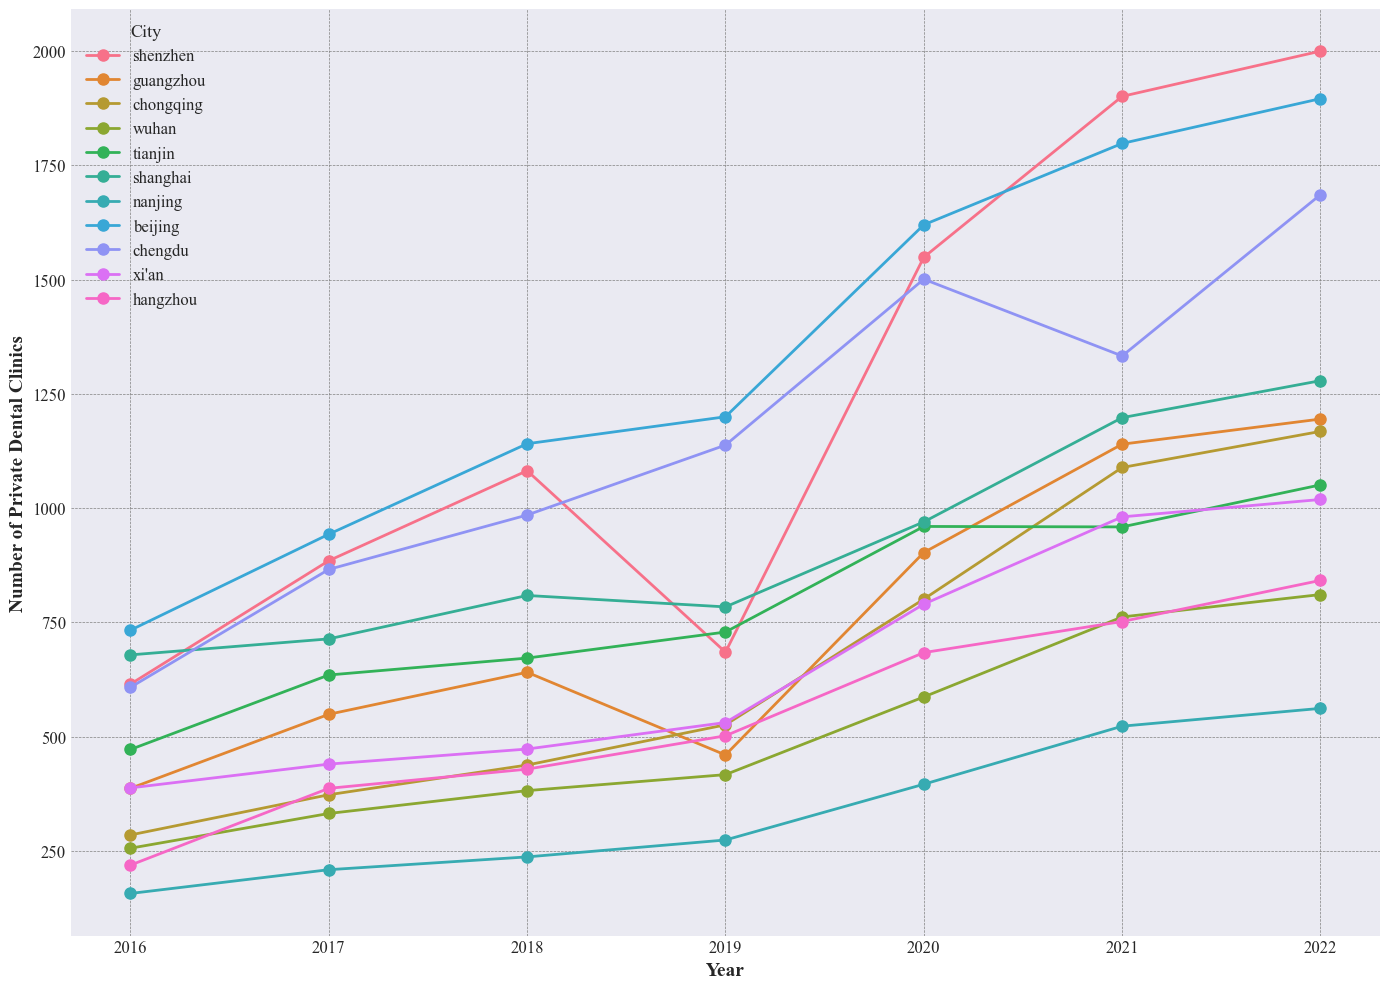

In [53]:
# Set the style of the matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams["font.family"] = "Times New Roman"
# Create a color palette
palette = sns.color_palette("husl", len(cities))

plt.figure(figsize=(14, 10))
for i, city in enumerate(cities):
    city_years = [int(year) for name in name_list if city in name for year in name.split() if year.isdigit()]
    city_kou_values = [dental_number[i] for i, name in enumerate(name_list) if city in name]
    plt.plot(city_years, city_kou_values, marker='o', linestyle='-', color=palette[i], label=city_label[i], linewidth=2, markersize=8)

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Private Dental Clinics', fontsize=14, fontweight='bold')
# plt.title('Number of Private Dental Clinics by City and Year', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, title="City", title_fontsize='13', loc='upper left')
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('private_dental_clinics_by_city_and_year.pdf', dpi=300)

plt.show()